<a href="https://colab.research.google.com/github/Amukozoberit/Electric-car-financial-analysis/blob/main/Descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Exploratory Data Analsyis
EDA – plays a critical role in understanding the what, why, and how of the problem statement. It’s first in the order of operations that a data analyst will perform when handed a new data source and problem statement.

[Reference](https://www.kite.com/blog/python/data-analysis-visualization-python/)

# Define Question

Which country and type of location has more people with bank accounts?

e.g-Kenya,Rural



# Define metrics for sucess
  We have found out the country with most population of people with bank accounts and their location

# Understanding the context

  Commercial banks are essential they enable houselholds to save 

  facilitate payments

  imporve access to to other financial services

  Bank accounts have relationship with economy growth.

# Data analysis

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

Load DataSet

In [43]:
data=pd.read_csv('/content/Financial Dataset - 1.csv')

In [44]:
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [45]:
data.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [46]:
# / rename columns with mispeled column names
data.rename({'The relathip with head':'The relashionship with head','Level of Educuation':'Level of Education'},inplace=True)

In [47]:
data.shape

(23524, 13)

In [48]:
data.info

<bound method DataFrame.info of       country  year       uniqueid Has a Bank account Type of Location  \
0       Kenya  2018     uniqueid_1                Yes            Rural   
1       Kenya  2018     uniqueid_2                 No            Rural   
2       Kenya  2018     uniqueid_3                Yes            Urban   
3       Kenya  2018     uniqueid_4                 No            Rural   
4       Kenya  2018     uniqueid_5                 No            Urban   
...       ...   ...            ...                ...              ...   
23519  Uganda  2018  uniqueid_2113                 No            Rural   
23520  Uganda  2018  uniqueid_2114                 No            Rural   
23521  Uganda  2018  uniqueid_2115                 No            Rural   
23522  Uganda  2018  uniqueid_2116                 No            Urban   
23523  Uganda  2018  uniqueid_2117                 No            Rural   

      Cell Phone Access  household_size  Respondent Age gender_of_respondent  \

Explore the data 
Numerical and categorica variables

In [49]:
data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


We have 3 numerical variables 
1. year
2. household
3. Respondent age

# Data Cleaning

In [50]:
data.isnull().sum(
)

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

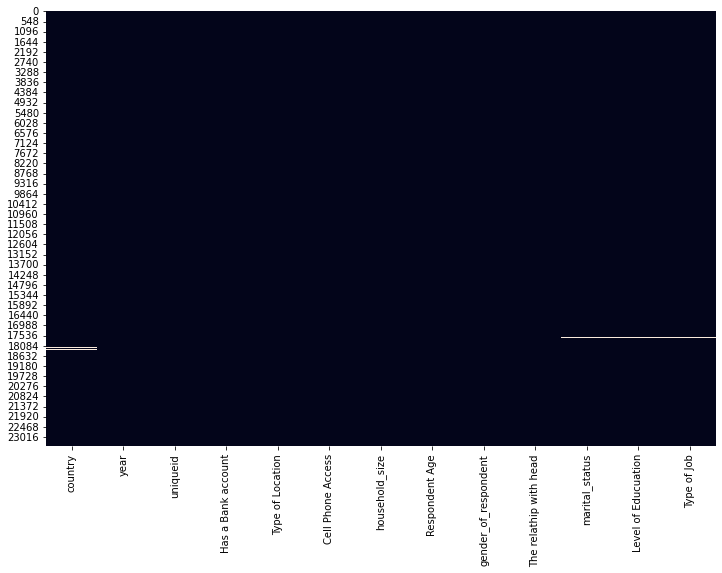

In [51]:
# visualize missing values
plt.figure(figsize=(12,8))

sns.heatmap(data.isnull(),cbar=False)

In [52]:
# drop nulls we have enough data to work with
data.dropna(axis=0,inplace=True)
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [53]:
# remove duplicates
data.drop_duplicates(inplace=True)


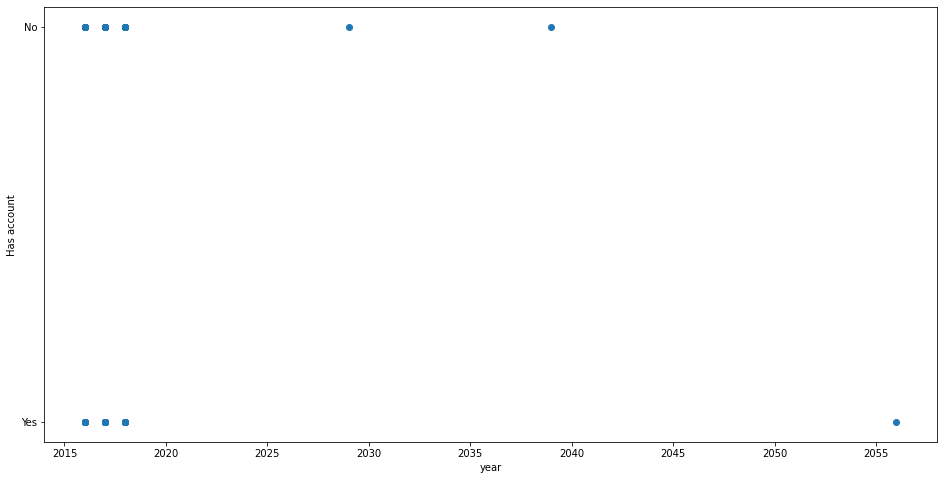

In [54]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['year'], data['Has a Bank account'])
ax.set_xlabel('year')
ax.set_ylabel('Has account')
plt.show()

### Max year is 2018

In [55]:
# Remove outliers 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1


# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
data_out = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(data.shape)

# Printing the shape of our old dataset
# ---
#
print(data_out.shape)

(23343, 13)
(22725, 13)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # Remove the CWD from sys.path while we load stuff.


Understanding our dataset

## Univariate and bivariate Analysis

([<matplotlib.patches.Wedge at 0x7fc9890196d0>,
 [Text(-0.9934754777857246, 0.4722356139030879, 'No'),
  Text(0.9934754777857246, -0.472235613903088, 'Yes')],
 [Text(-0.5418957151558498, 0.257583062128957, '85.88%'),
  Text(0.5418957151558498, -0.25758306212895704, '14.12%')])

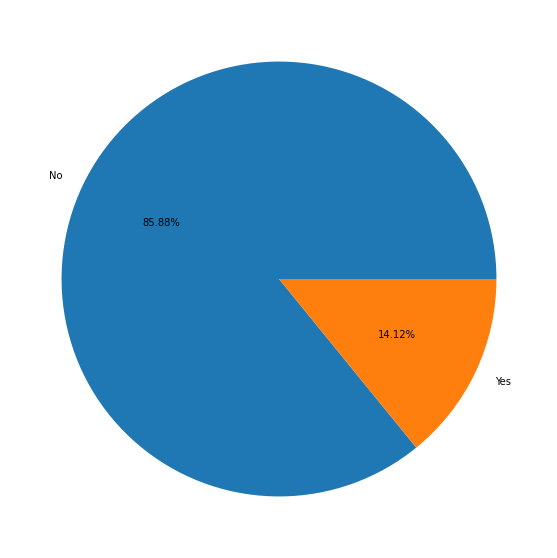

In [56]:
data_values=data['Has a Bank account'].value_counts()
data_index=data['Has a Bank account'].value_counts().index
# plt.bar(data_values,data_index,color='maroon')
plt.pie(
    data_values,
    labels=data_index,
    autopct='%1.2f%%',
    explode=None,

)

# plt.scatter(data_values,data_index)
# plt.show()

14.12% of people have bank accounts

Text(0.5, 0, 'Has account')

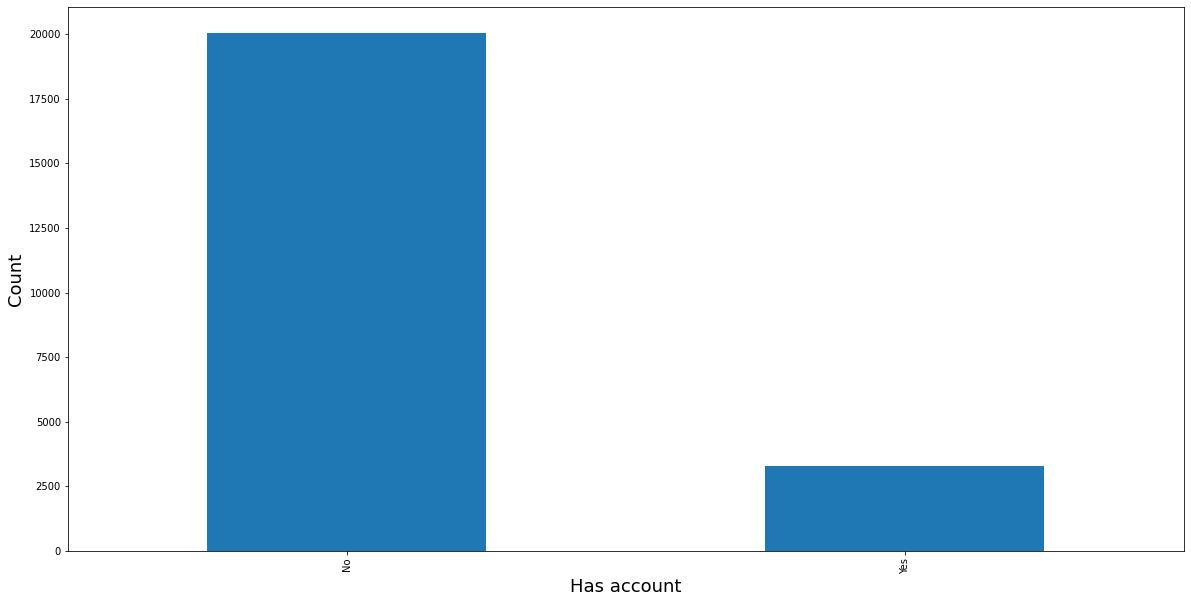

In [57]:
data_values.plot.bar()
plt.ylabel('Count', fontsize=18)
plt.xlabel('Has account', fontsize=18)

higher number of people have no accounts

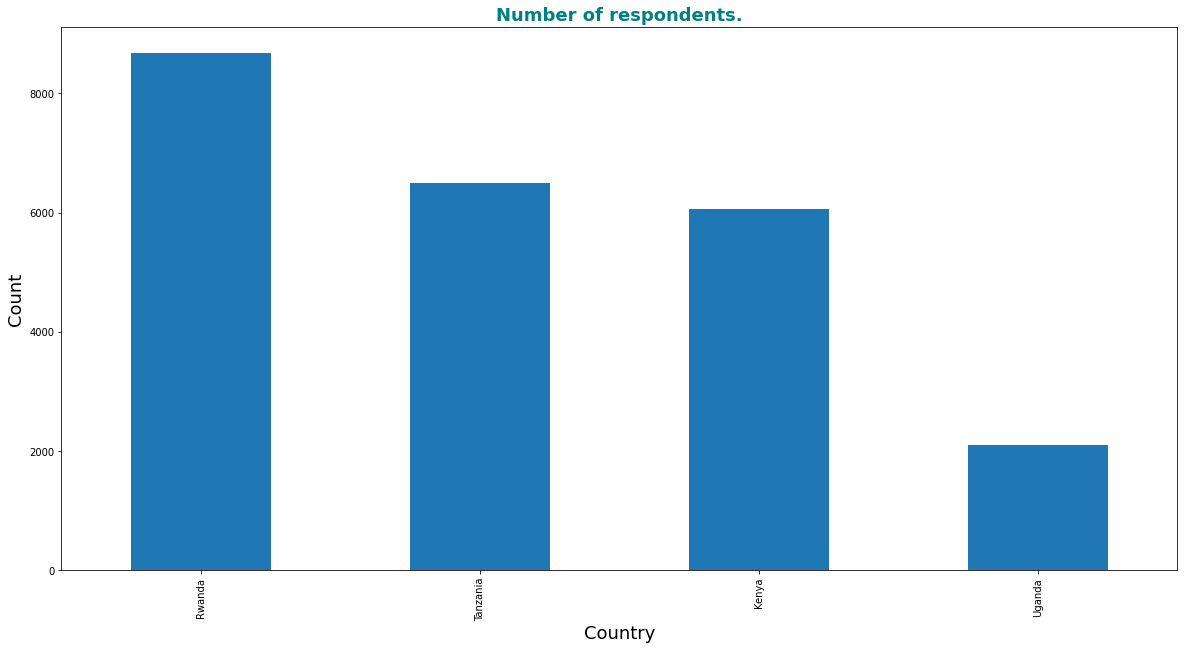

In [58]:
data['country'].value_counts().plot.bar()
plt.title('Number of respondents.', fontsize=18, fontweight = 'bold', color = 'teal')
plt.ylabel('Count', fontsize=18)
plt.xlabel('Country', fontsize=18)
plt.show()

### Rwanda has the highest number of respondents

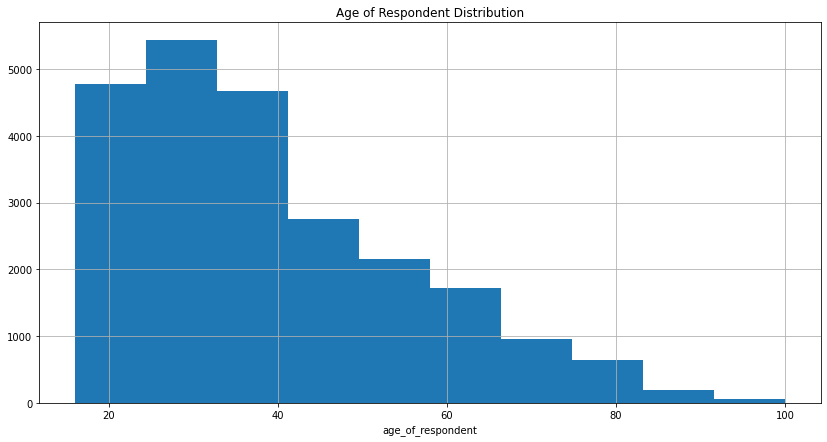

In [59]:
plt.figure(figsize=(14,7))
data['Respondent Age'].hist() 
plt.title("Age of Respondent Distribution")
plt.xlabel('age_of_respondent')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

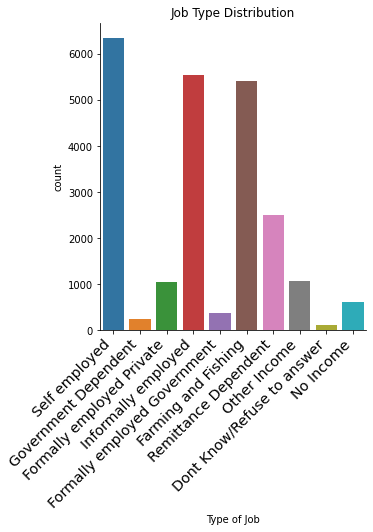

In [61]:
sns.catplot(x="Type of Job", kind="count", data=data)
plt.title("Job Type Distribution")

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Majority people  are aged 20-40

 # Rwanda highest number of respondents

Observation:
1. 14.09% out of 100% of the people have bank accounts
2. More people upto 85% have no bank accounts


### Who is this 14.09%?

### which year did they most have accounts

### where do they live

### age groups

## Bivariate data

In [ ]:
data_grouped=data.groupby(['Has a Bank account','country','Type of Location','Level of Educuation','year']).size()
data_grouped

Has a Bank account  country  Type of Location  Level of Educuation              year
No                  Kenya    Rural             No formal education              2018     691
                                               Other/Dont know/RTA              2018       2
                                               Primary education                2018    1463
                                               Secondary education              2018     677
                                               Tertiary education               2018      26
                                                                                        ... 
Yes                 Uganda   Urban             No formal education              2018       2
                                               Primary education                2018      15
                                               Secondary education              2018      47
                                               Tertiary education             

Text(0.5, 0, 'account,Level of education')

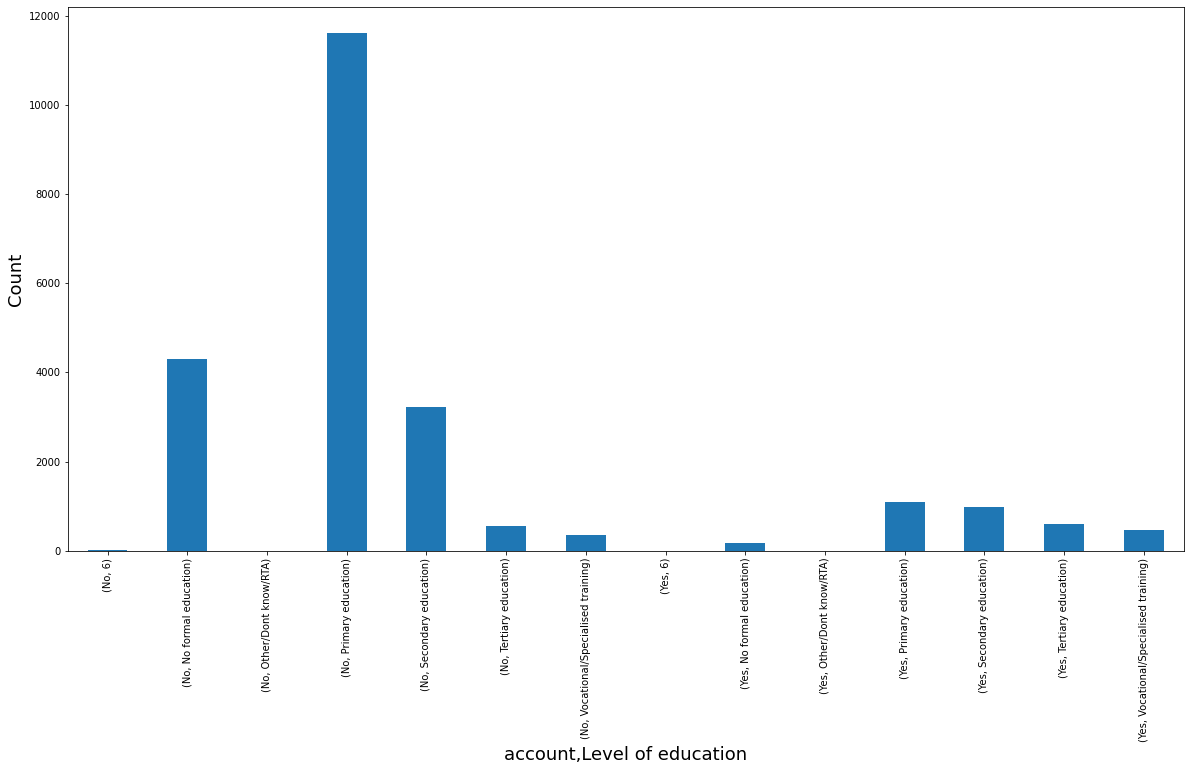

In [ ]:

# ?relationships between variables
# Bivariate analysis uses scatter plotes


bank_educ=data.groupby(['Has a Bank account','Level of Educuation']).size()



bank_educ.plot.bar()
plt.ylabel('Count', fontsize=18)
plt.xlabel('account,Level of education', fontsize=18)

No primary education have highest people with no account highest yes is with primary education

Text(0.5, 0, 'account,year')

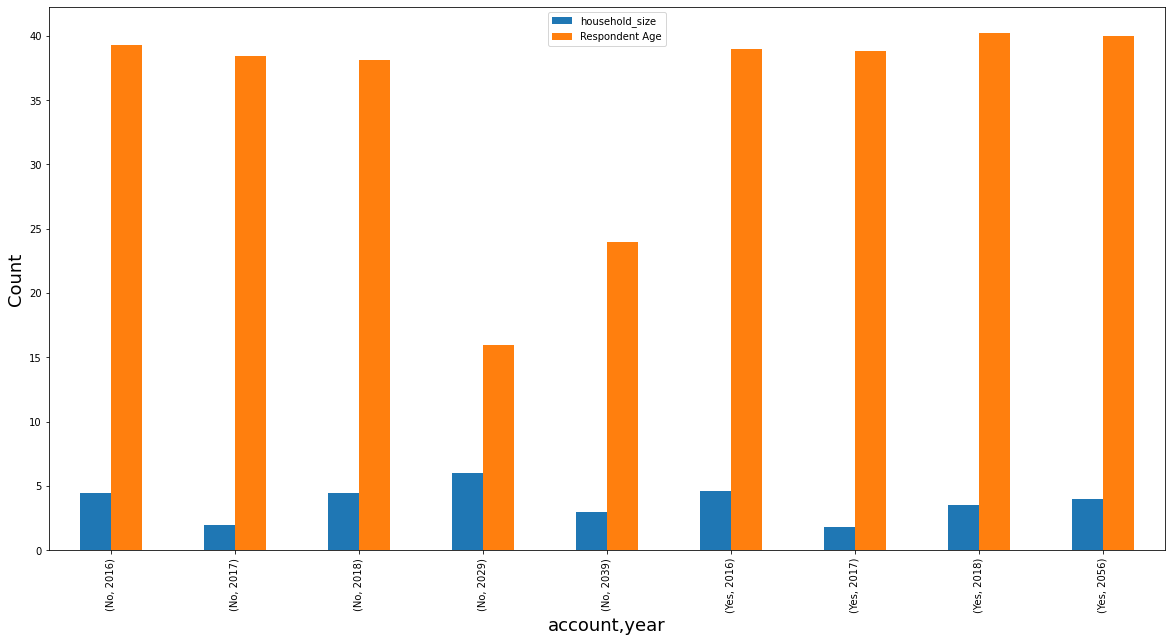

In [ ]:

bank_year=data.groupby(['Has a Bank account','year']).mean()
bank_year.plot.bar()
plt.ylabel('Count', fontsize=18)
plt.xlabel('account,year', fontsize=18)

Text(0.5, 0, 'account,Country')

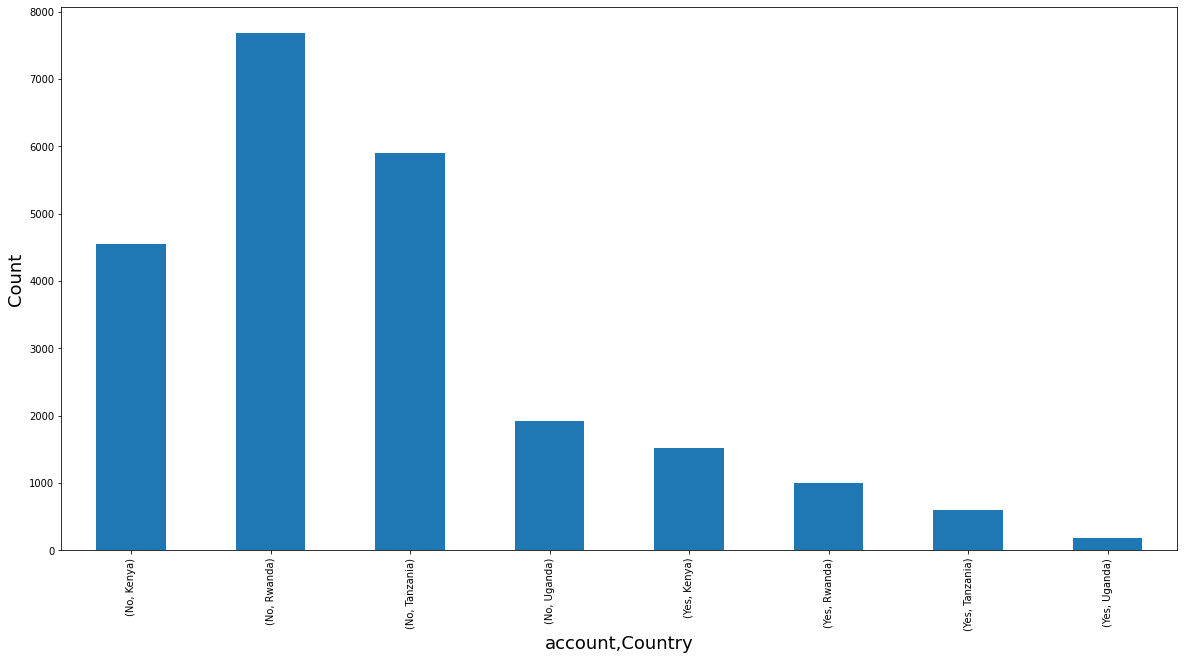

In [ ]:
bank_country=data.groupby(['Has a Bank account','country']).size()
bank_country.plot.bar()
plt.ylabel('Count', fontsize=18)
plt.xlabel('account,Country', fontsize=18)

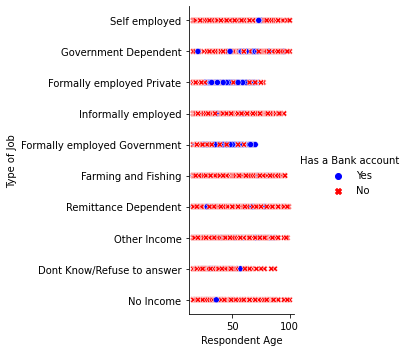

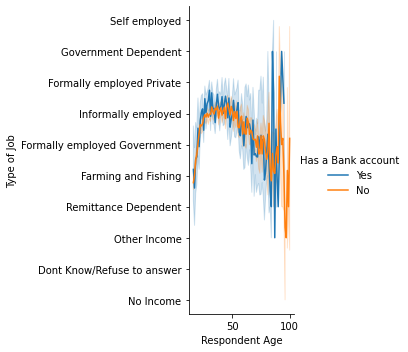

In [91]:
sns.relplot(data=data,y=data["Type of Job"], x=data['Respondent Age'],
    hue=data["Has a Bank account"], style="Has a Bank account",
    palette=["b", "r"], sizes=(10, 100)
) 

sns.relplot(hue=data["Has a Bank account"], y=data["Type of Job"],x=data['Respondent Age'], data=data,kind='line',sizes=(10, 100)) 

1. Formally employed government,Formally employed private,government dependent people have accounts with .ages range between 20 70 and 

# Observation:
1. In the year 2018 **Kenya** had the largest number of people with bank accounts-**906 +614** =1521 most of the people.Followed by Rwanda

2.Bank accounts stated being popular in 2016 and more people had accounts in **2018**

3.Level of education does not affect having an account because those with primary education have highest number of people with bank accounts which is a very small percent of the total of primarh school dropouts.

1.   Those with ternary and vocational training have the highest percentage of people with accounts
2.   Those who have secondary education and below have the lowest percentage of people with bank accounts.number is high but percentage is low

4. Highest houshold has the least




In [ ]:
# Calculating the pearson coefficient
pearson_coeff = data["Respondent Age"].corr(data["household_size"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = data["Respondent Age"].corr(data["household_size"]) 
print(coeff)

-0.11970919507762415
-0.11970919507762415


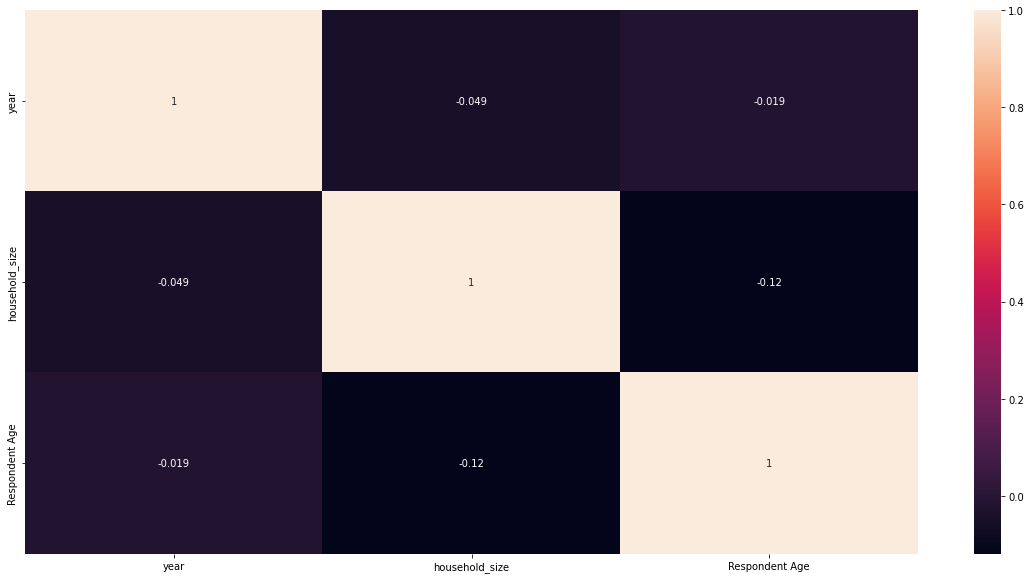

In [ ]:
# heatmap
sns.heatmap(data.corr(),annot=True)
plt.show()


### Respondent age and household size are highly correlated

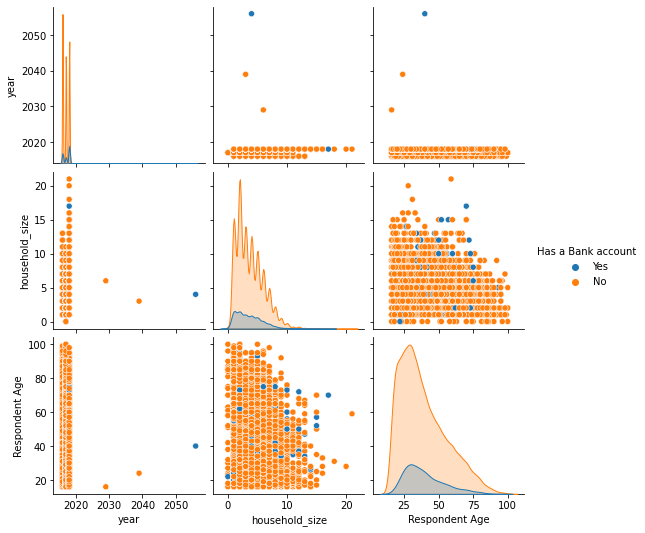

In [62]:
sns.pairplot(data, hue ='Has a Bank account' )

# Solution with PCA

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




In [ ]:
data_pca=pd.read_csv('/content/Financial Dataset - 1.csv')

In [ ]:
print(data_pca.head())
print(data_pca.tail())

  country  year    uniqueid Has a Bank account Type of Location  \
0   Kenya  2018  uniqueid_1                Yes            Rural   
1   Kenya  2018  uniqueid_2                 No            Rural   
2   Kenya  2018  uniqueid_3                Yes            Urban   
3   Kenya  2018  uniqueid_4                 No            Rural   
4   Kenya  2018  uniqueid_5                 No            Urban   

  Cell Phone Access  household_size  Respondent Age gender_of_respondent  \
0               Yes             3.0            24.0               Female   
1                No             5.0            70.0               Female   
2               Yes             5.0            26.0                 Male   
3               Yes             5.0            34.0               Female   
4                No             8.0            26.0                 Male   

  The relathip with head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household          

In [ ]:
# convert to numerics
data_pca
# pd.get_dummies(data['Has a Bank account','Cell Phone Access','Type of Location','gender_of_respondent','marital_status','Level of Educuation','Type of Job','The relathip with head'])
data_pca['Level of Educuation'].replace(['6','Tertiary education','Vocational/Specialised training','Secondary education','Primary education', 'No formal education','Dont know','Other/Dont know/RTA'],[7,6,5,4,3,2,1,0], inplace=True)
data_pca['Has a Bank account'].replace(['Yes','No'],[1,0], inplace=True)
data_pca['Cell Phone Access'].replace(['Yes','No'],[1,0], inplace=True)
data_pca['gender_of_respondent'].replace(['Female','Male'],[0,1], inplace=True)
data_pca['Type of Location'].replace(['Rural','Urban'],[0,1], inplace=True)
data_pca['The relathip with head'].replace(['Head of Household','Spouse','Parent','Child','Other relative','Other non-relatives'],[1,2,3,4,5,6],inplace=True)
data_pca

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,0.0,1.0,3.0,24.0,0.0,2.0,Married/Living together,4.0,Self employed
1,Kenya,2018,uniqueid_2,0.0,0.0,0.0,5.0,70.0,0.0,1.0,Widowed,2.0,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,1.0,1.0,5.0,26.0,1.0,5.0,Single/Never Married,5.0,Self employed
3,Kenya,2018,uniqueid_4,0.0,0.0,1.0,5.0,34.0,0.0,1.0,Married/Living together,3.0,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,1.0,0.0,8.0,26.0,1.0,4.0,Single/Never Married,3.0,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0.0,0.0,1.0,4.0,48.0,0.0,1.0,Divorced/Seperated,2.0,Other Income
23520,Uganda,2018,uniqueid_2114,0.0,0.0,1.0,2.0,27.0,0.0,1.0,Single/Never Married,4.0,Other Income
23521,Uganda,2018,uniqueid_2115,0.0,0.0,1.0,5.0,27.0,0.0,3.0,Widowed,3.0,Other Income
23522,Uganda,2018,uniqueid_2116,0.0,1.0,1.0,7.0,30.0,0.0,3.0,Divorced/Seperated,4.0,Self employed


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_pca[['Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head','Level of Educuation'
       ]])
scaled_data = scaler.transform(data_pca[['Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'Level of Educuation'
       ]])
# data.iloc[:,3:]


In [ ]:
# scaled_data.fillna(0)
# ?fill nuls
scaled_data[np.isnan(scaled_data)] = 0

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=3)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=3)

In [ ]:
x_pca=pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(23524, 8)

In [ ]:
x_pca.shape

(23524, 3)

In [ ]:
x_pca

array([[ 1.72277402, -0.91838275,  0.3559476 ],
       [-2.62630926,  0.90128926,  0.52641429],
       [ 3.7605405 , -0.96616754, -0.60509566],
       ...,
       [ 0.82027038,  1.49504082,  0.43583418],
       [ 1.55772224,  0.89306023, -0.49699618],
       [ 2.58888547,  1.82667234,  1.687587  ]])

Text(0, 0.5, 'Second principle component')

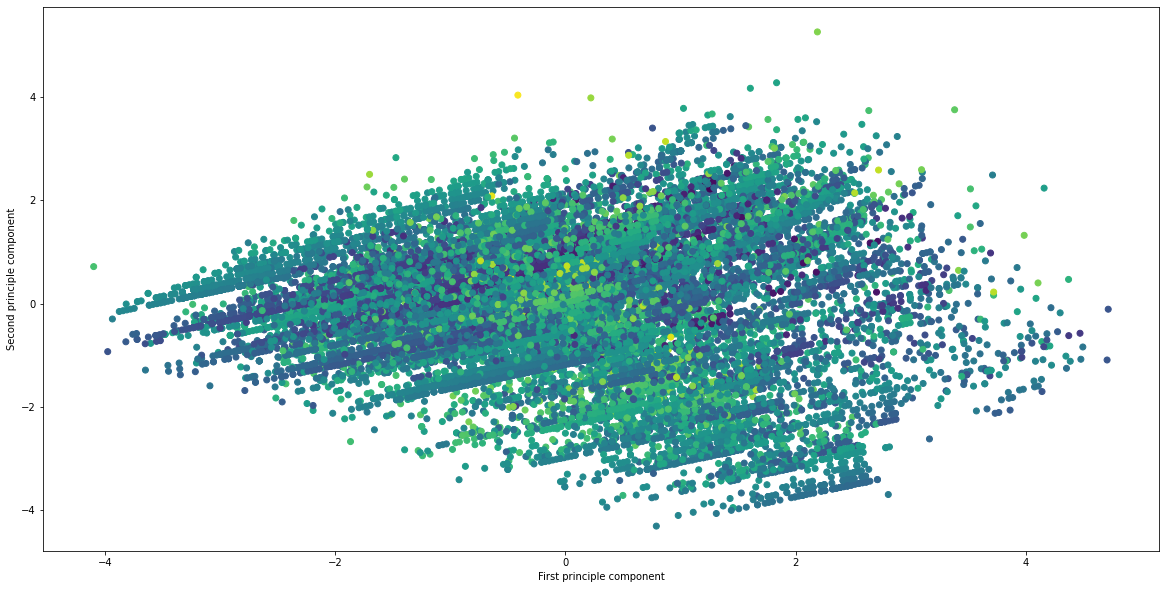

In [ ]:

plt.scatter(x_pca[:,0],x_pca[:,1],c=x_pca[:,2])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

## Sucessfully reduced the variables to 3

# Challenge your solution by providing insights on how you can make improvements.


  1. How to identify the ages count and not just the range